In [2]:
import numpy as np 
import pandas as pd

In [3]:
training_variants_df = pd.read_csv("./data/training_variants")

In [4]:
training_text_df = pd.read_csv("./data/training_text",sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

In [11]:
training_merge_df = training_variants_df.merge(training_text_df,left_on="ID",right_on="ID").fillna('')

In [40]:
from sklearn.model_selection import train_test_split

train ,test = train_test_split(training_merge_df,test_size=0.2) 
np.random.seed(0)


In [13]:
X_train = train['Text'].values
X_test = test['Text'].values
y_train = train['Class'].values
y_test = test['Class'].values


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm

In [38]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', svm.LinearSVC())
])
text_clf = text_clf.fit(X_train,y_train)

In [37]:
y_test_predicted = text_clf_RandomForest.predict(X_test)
np.mean(y_test_predicted == y_test)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


0.4992481203007519

Accuracy: 0.6345864661654136


C:\Users\rajesh.nv\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


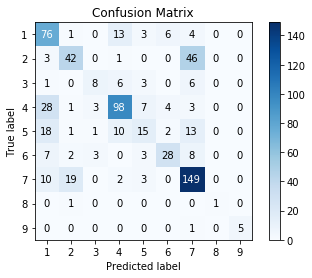

In [35]:
from sklearn.metrics import log_loss, accuracy_score
import scikitplot as skpltcm
#print('Log loss: {}'.format(log_loss(y_test, y_test_predicted)))
print('Accuracy: {}'.format(accuracy_score(y_test, y_test_predicted)))
skpltcm.metrics.plot_confusion_matrix(y_test, y_test_predicted)

## Testing data 

In [46]:
testing_text_df = pd.read_csv("./data/test_text",sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
testing_variants_df = pd.read_csv("./data/test_variants")
testing_merge_df = testing_variants_df.merge(testing_text_df,left_on="ID",right_on="ID").fillna('')

In [47]:
X_test_final = testing_merge_df['Text'].values
predicted_class = text_clf.predict(X_test_final)
testing_merge_df['predicted_class'] = predicted_class
testing_merge_df.head(5)

,ID,Gene,Variation,Text,predicted_class
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,7
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,4
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,7
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,7
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,4


In [48]:
onehot = pd.get_dummies(testing_merge_df['predicted_class'])
testing_merge_df = testing_merge_df.join(onehot)
testing_merge_df.head(5)

,ID,Gene,Variation,Text,predicted_class,1,2,3,4,5,6,7,8,9
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,7,0,0,0,0,0,0,1,0,0
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,4,0,0,0,1,0,0,0,0,0
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,7,0,0,0,0,0,0,1,0,0
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,7,0,0,0,0,0,0,1,0,0
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,4,0,0,0,1,0,0,0,0,0


In [49]:
submission_df = testing_merge_df[["ID",1,2,3,4,5,6,7,8,9]]
submission_df.columns = ['ID', 'class1','class2','class3','class4','class5','class6','class7','class8','class9']
submission_df.head(5)

,ID,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0
2,2,0,0,0,0,0,0,1,0,0
3,3,0,0,0,0,0,0,1,0,0
4,4,0,0,0,1,0,0,0,0,0
